# `Laptop Data Analysis `

### Done By `Yash Sharma`

#### Import All the Libraries Required By The Data For The Analysis

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression #For Algorithm
from sklearn.model_selection import train_test_split # for Data Validation
from sklearn.metrics import r2_score,mean_squared_error #for The Evaluation 
from sklearn.preprocessing import LabelEncoder
import re


<h3> <pre> Now We Are reading The CSV File Named - laptopData.csv

In [2]:
df=pd.read_csv('laptopData.csv')
print(f'The File laptopData.csv Fetched Sucessfully !!')

The File laptopData.csv Fetched Sucessfully !!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Here Is The First 5 Rows Of The Dataset

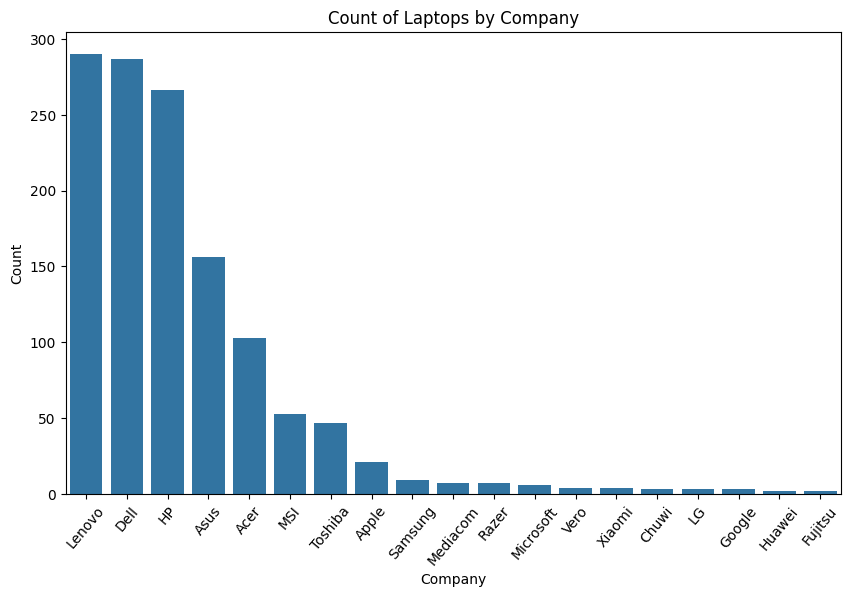

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Company', order=df['Company'].value_counts().index)
plt.title("Count of Laptops by Company")
plt.xticks(rotation=50)
plt.xlabel("Company")
plt.ylabel("Count")
plt.show()

## Most famous Laptop Brand Is : `Lenovo`
### Whereas Second One is : `DELL`
### Whereas Third One is : `HP`

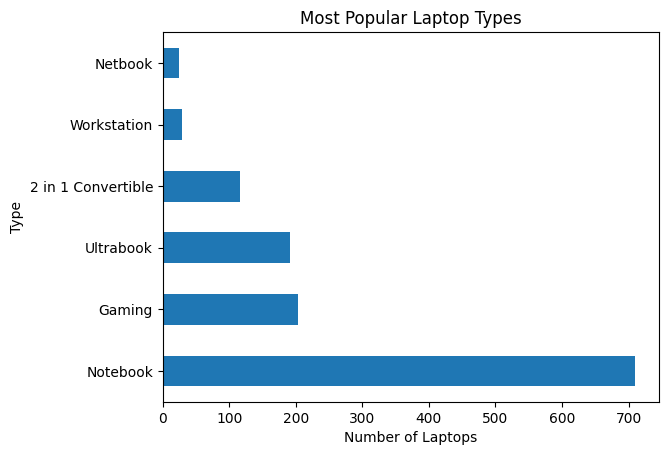

In [6]:
df['TypeName'].value_counts().plot(kind='barh')
plt.title("Most Popular Laptop Types")
plt.xlabel("Number of Laptops")
plt.ylabel("Type")
plt.show()


### Most Used Laptop Category is - `Notebook`
#### WhereAs Least One is - `Netbook`

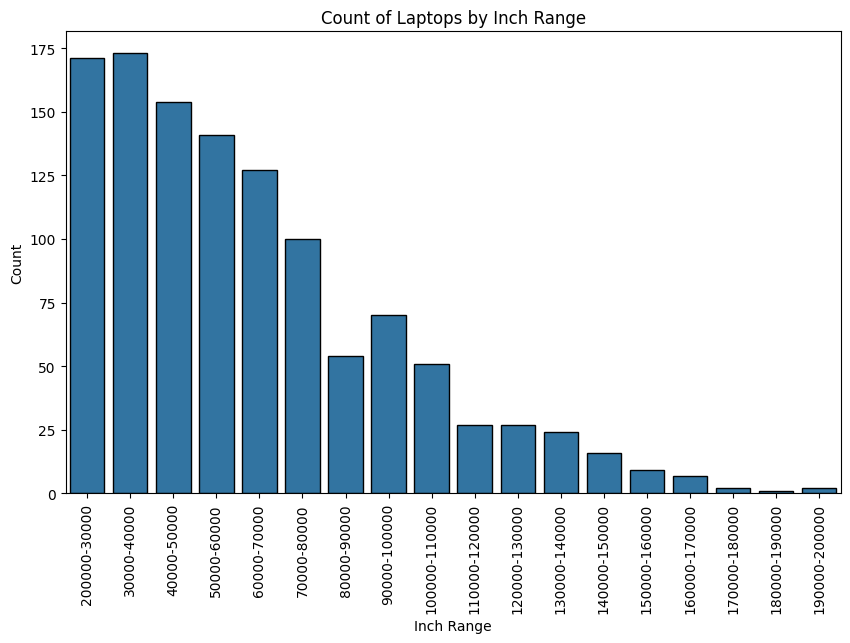

In [7]:
bins = [20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000]
labels = ['200000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000', '80000-90000', '90000-100000', '100000-110000', '110000-120000', '120000-130000', '130000-140000', '140000-150000', '150000-160000', '160000-170000', '170000-180000', '180000-190000', '190000-200000']
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df["PriceRange"] = pd.cut(df['Price'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PriceRange', order=labels,edgecolor='Black')
plt.title("Count of Laptops by Inch Range")
plt.xlabel("Inch Range")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

### Most Laptops Lie in 30K-40K Range (Budget Laptops)

In [8]:
premium_price_threshold = 110000  # Set your premium laptop price cutoff

# Filter DataFrame for premium laptops
premium_laptops = df[df['Price'] >= premium_price_threshold]

# Count premium laptops by company
premium_counts = premium_laptops['Company'].value_counts().reset_index()
premium_counts.columns = ['Company', 'Premium Laptop Count']
premium_counts = premium_counts.sort_values(by='Premium Laptop Count', ascending=False)
print(premium_counts)

      Company  Premium Laptop Count
0        Dell                    30
1      Lenovo                    28
2          HP                    17
3         MSI                    17
4        Asus                    13
5       Razer                     5
6       Apple                     4
7     Toshiba                     2
8        Acer                     2
9          LG                     2
10     Google                     1
11  Microsoft                     1


### Premium Laptop Are Those Which are Above the Price Of 110000

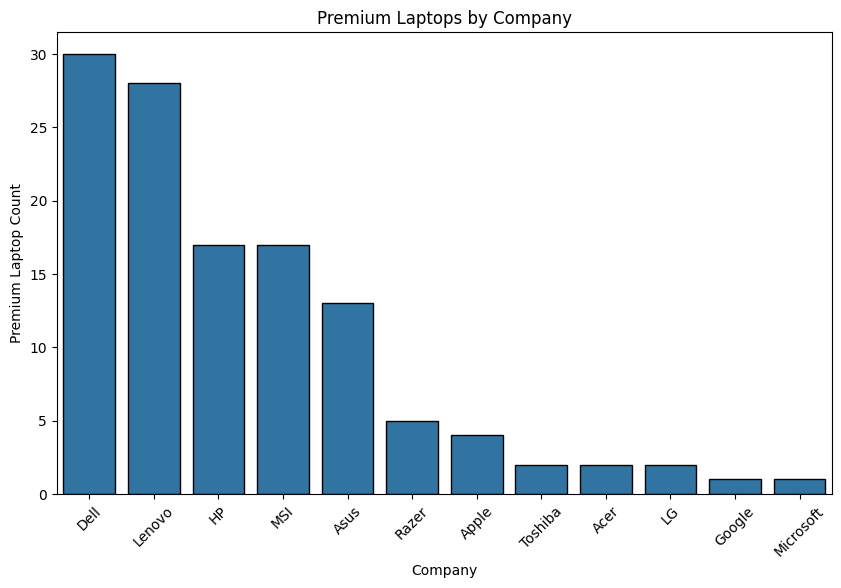

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=premium_counts, x='Company', y='Premium Laptop Count',edgecolor='black')
plt.title("Premium Laptops by Company")
plt.xlabel("Company")
plt.ylabel("Premium Laptop Count")
plt.xticks(rotation=45)
plt.show()

## As Per The Premium Market Priced Above `RS.1,10,000`
### The Most Premium Laptops Are Of `DELL`
#### Whereas `Microsoft` and `Google` Share The Least In The Premium Market

### Total Laptops Provided By The Each Companies


In [10]:
df['Company'].value_counts()

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

### Here We Get That Lenovo is the Comapny Builts Most Laptops

<Axes: xlabel='Company'>

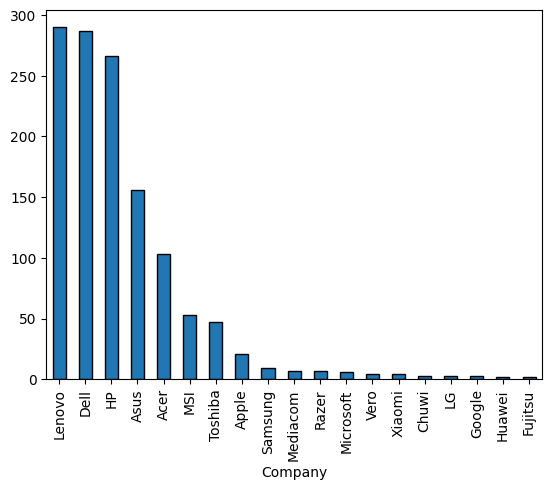

In [11]:
df['Company'].value_counts().plot(kind='bar',edgecolor='black')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        1273 non-null   float64 
 1   Company           1273 non-null   object  
 2   TypeName          1273 non-null   object  
 3   Inches            1273 non-null   object  
 4   ScreenResolution  1273 non-null   object  
 5   Cpu               1273 non-null   object  
 6   Ram               1273 non-null   object  
 7   Memory            1273 non-null   object  
 8   Gpu               1273 non-null   object  
 9   OpSys             1273 non-null   object  
 10  Weight            1273 non-null   object  
 11  Price             1273 non-null   float64 
 12  PriceRange        1156 non-null   category
dtypes: category(1), float64(2), object(10)
memory usage: 124.2+ KB


In [13]:
df['Ram']   


0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: Ram, Length: 1303, dtype: object

In [14]:
# Drop missing rows
df = df.dropna()
# Clean and convert RAM and Weight
df['Ram'] = df['Ram'].astype(str).str.replace('GB', '', regex=False).astype(int)

# Clean Weight
df['Weight'] = df['Weight'].replace('?', np.nan)
df['Weight'] = df['Weight'].astype(str).str.replace('kg', '', regex=False)
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df = df.dropna(subset=['Weight'])  # Drop rows where Weight couldn't be converted

In [15]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PriceRange
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,70000-80000
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,40000-50000
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,30000-40000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,130000-140000
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,90000-100000


<h2><pre>Dividing in Category on The Basis Of the Inches<pre>

In [16]:
bins = [10, 11, 12, 13, 14, 15, 16, 17, 18]
labels = ['10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18']
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')
df['InchRange'] = pd.cut(df['Inches'], bins=bins, labels=labels, right=False)

C:\Users\Yash\AppData\Local\Temp\ipykernel_21680\1140217086.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_price = df.groupby('InchRange')['Price'].mean().sort_values()


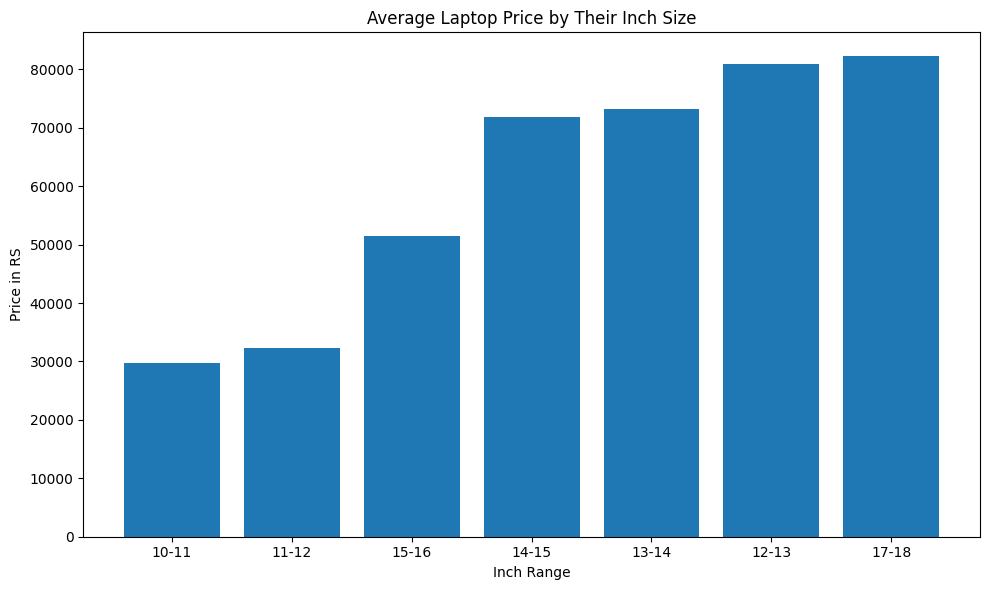

In [17]:
# Grouping by 'TypeName' and calculating average price (or count if needed)
type_price = df.groupby('InchRange')['Price'].mean().sort_values()
plt.figure(figsize=(10, 6))
plt.bar(type_price.index, type_price.values)
plt.title("Average Laptop Price by Their Inch Size")
plt.xlabel("Inch Range")
plt.ylabel("Price in RS")
plt.tight_layout()
plt.show()

## 17-18 Inch Ones Are Most Expensive even in Average Pricing
## Also 12-13 Inch Ones Lies in Same Category

In [18]:
company_avg_price = df.groupby('Company')['Price'].mean().sort_values(ascending=False)

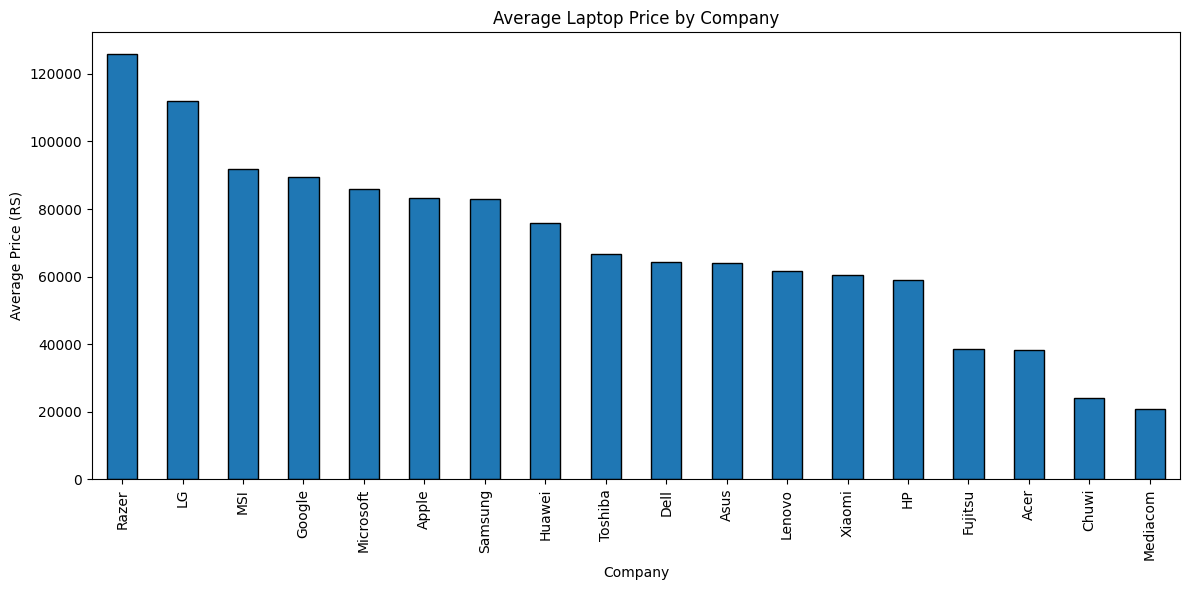

In [19]:
company_avg_price.plot(kind='bar', figsize=(12, 6),edgecolor='Black',title="Average Laptop Price by Company")
plt.ylabel("Average Price (RS)")
plt.xlabel("Company")
plt.tight_layout()
plt.show()

## Razer Is having The Highest Average Pricing of Laptop which could be The Reason for their Less Sales 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1155 entries, 0 to 1301
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Unnamed: 0        1155 non-null   float64 
 1   Company           1155 non-null   object  
 2   TypeName          1155 non-null   object  
 3   Inches            1154 non-null   float64 
 4   ScreenResolution  1155 non-null   object  
 5   Cpu               1155 non-null   object  
 6   Ram               1155 non-null   int64   
 7   Memory            1155 non-null   object  
 8   Gpu               1155 non-null   object  
 9   OpSys             1155 non-null   object  
 10  Weight            1155 non-null   float64 
 11  Price             1155 non-null   float64 
 12  PriceRange        1155 non-null   category
 13  InchRange         1145 non-null   category
dtypes: category(2), float64(4), int64(1), object(7)
memory usage: 120.6+ KB


### Price vs TypeName


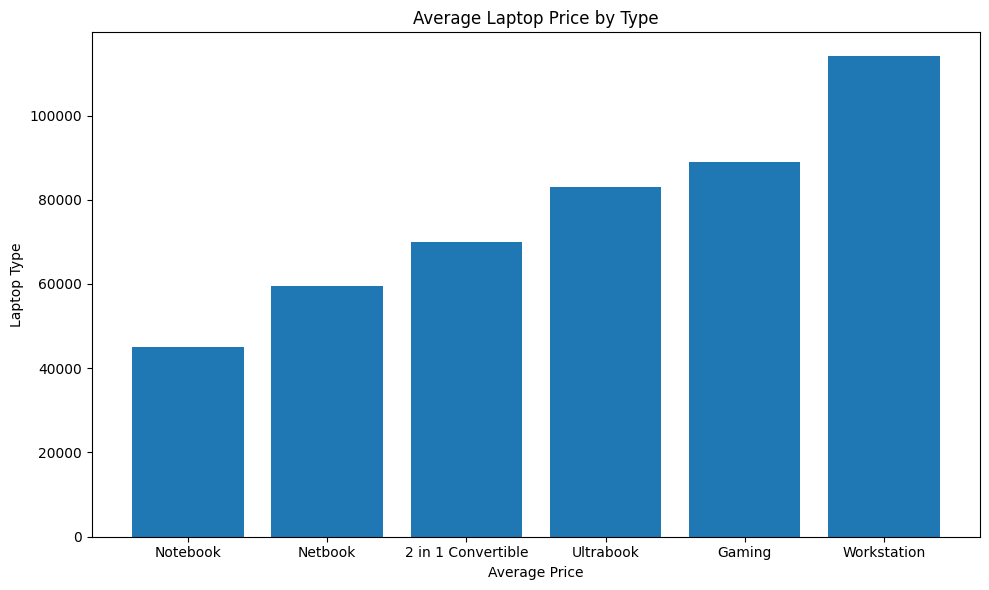

In [21]:
# Grouping by 'TypeName' and calculating average price (or count if needed)
type_price = df.groupby('TypeName')['Price'].mean().sort_values()
plt.figure(figsize=(10, 6))
plt.bar(type_price.index, type_price.values)
plt.title("Average Laptop Price by Type")
plt.xlabel("Average Price")
plt.ylabel("Laptop Type")
plt.tight_layout()
plt.show()

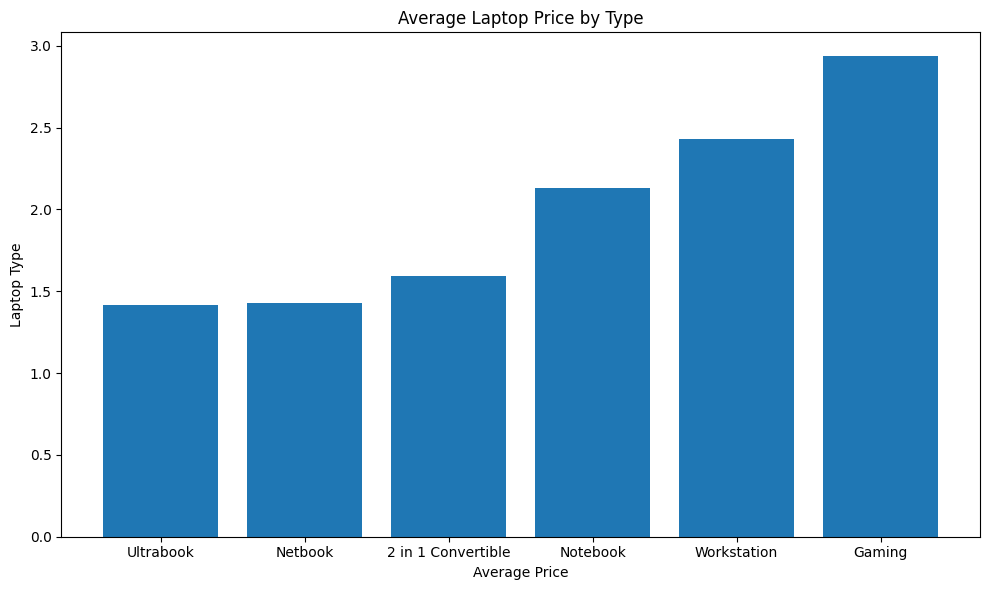

In [22]:
# Grouping by 'TypeName' and calculating average price (or count if needed)
type_price = df.groupby('TypeName')['Weight'].mean().sort_values()
plt.figure(figsize=(10, 6))
plt.bar(type_price.index, type_price.values)
plt.title("Average Laptop Price by Type")
plt.xlabel("Average Price")
plt.ylabel("Laptop Type")
plt.tight_layout()
plt.show()

### `UltraBook` Are The Lightest
### WhereAs The `Gaming` Ones Are Most Heaviest

In [23]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PriceRange,InchRange
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,70000-80000,13-14
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,40000-50000,13-14
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,30000-40000,15-16
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,130000-140000,15-16
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,90000-100000,13-14


In [24]:
def categorize_cpu(cpu_name):
    cpu_name = cpu_name.lower()
    if 'intel core i3' in cpu_name:
        return 'Intel Core i3'
    elif 'intel core i5' in cpu_name:
        return 'Intel Core i5'
    elif 'intel core i7' in cpu_name:
        return 'Intel Core i7'
    elif 'intel core i9' in cpu_name:
        return 'Intel Core i9'
    elif 'intel pentium' in cpu_name or 'intel celeron' in cpu_name:
        return 'Other Intel'
    elif 'amd ryzen 3' in cpu_name:
        return 'AMD Ryzen 3'
    elif 'amd ryzen 5' in cpu_name:
        return 'AMD Ryzen 5'
    elif 'amd ryzen 7' in cpu_name:
        return 'AMD Ryzen 7'
    elif 'amd ryzen 9' in cpu_name:
        return 'AMD Ryzen 9'
    elif 'amd a' in cpu_name or 'amd e' in cpu_name:
        return 'Other AMD'
    elif 'apple' in cpu_name:
        return 'Apple M Series'
    else:
        return 'Other'

df['CpuCategory'] = df['Cpu'].apply(categorize_cpu)


In [25]:
print(df['CpuCategory'].value_counts())


CpuCategory
Intel Core i7    509
Intel Core i5    410
Intel Core i3    125
Other AMD         44
Other Intel       36
Other             31
Name: count, dtype: int64


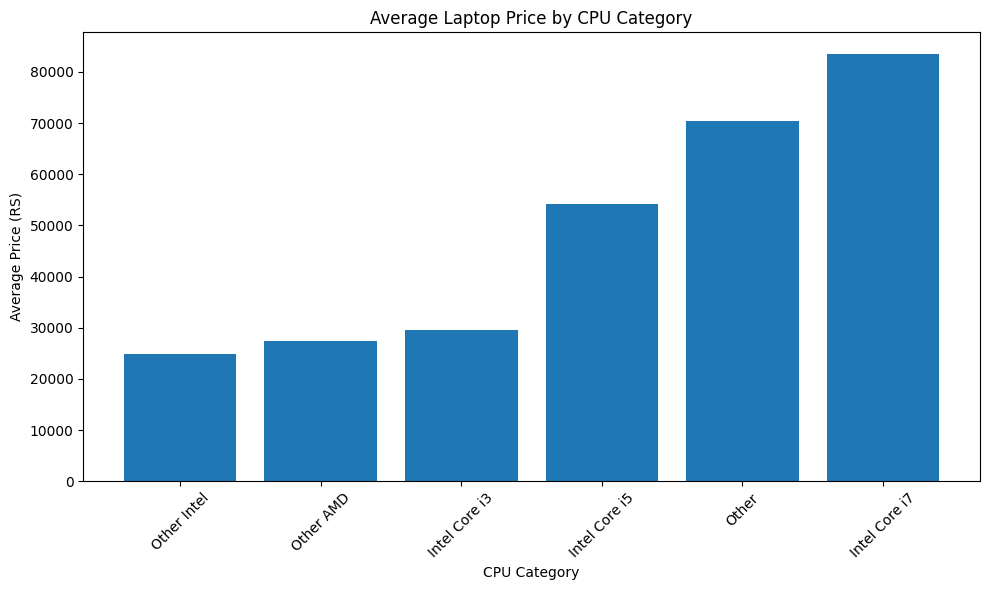

In [26]:
cpu_price = df.groupby('CpuCategory')['Price'].mean().sort_values()
plt.figure(figsize=(10, 6))
plt.bar(cpu_price.index, cpu_price.values)
plt.xticks(rotation=45)
plt.title("Average Laptop Price by CPU Category")
plt.xlabel("CPU Category")
plt.ylabel("Average Price (RS)")
plt.tight_layout()
plt.show()


### Here We Get To Know that Most Expensive Ones are having `Intel I7` 

In [27]:
apple_laptops = df[df['Company'] == 'Apple']
apple_cpus = apple_laptops['Cpu'].value_counts()
print(apple_cpus)
apple_laptops['Cpu'].unique()


Cpu
Intel Core i5 1.6GHz      3
Intel Core i5 2.3GHz      2
Intel Core i5 3.1GHz      2
Intel Core M 1.2GHz       2
Intel Core M 1.1GHz       2
Intel Core i5 1.8GHz      2
Intel Core i7 2.8GHz      1
Intel Core i7 2.2GHz      1
Intel Core i7 2.7GHz      1
Intel Core M m3 1.2GHz    1
Intel Core i5 2.0GHz      1
Intel Core i7 2.9GHz      1
Intel Core i5 2.9GHz      1
Intel Core i5 1.3GHz      1
Name: count, dtype: int64


array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i7 2.7GHz', 'Intel Core i5 3.1GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 2.8GHz',
       'Intel Core M m3 1.2GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i5 2.0GHz',
       'Intel Core i5 1.3GHz', 'Intel Core i5 2.9GHz',
       'Intel Core M 1.2GHz', 'Intel Core M 1.1GHz'], dtype=object)

<Axes: ylabel='Cpu'>

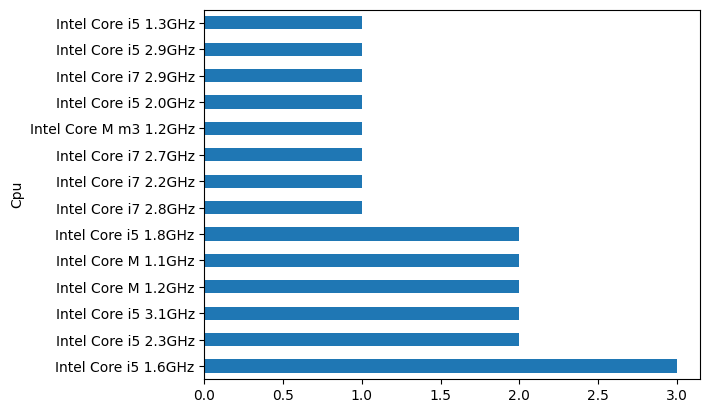

In [28]:
apple_laptops['Cpu'].value_counts().plot(kind='barh')

In [29]:
def categorize_gpu(gpu):
    if 'Intel' in gpu:
        return 'Intel Integrated'
    elif 'Nvidia' in gpu or 'NVIDIA' in gpu:
        return 'Nvidia'
    elif 'AMD' in gpu:
        return 'AMD'
    else:
        return 'Other'

df['GpuCategory'] = df['Gpu'].apply(categorize_gpu)


In [30]:
cpu_gpu_relation = pd.crosstab(df['CpuCategory'], df['GpuCategory'])
print(cpu_gpu_relation)


GpuCategory    AMD  Intel Integrated  Nvidia  Other
CpuCategory                                        
Intel Core i3   19                87      19      0
Intel Core i5   42               281      87      0
Intel Core i7   52               182     275      0
Other            6                22       2      1
Other AMD       44                 0       0      0
Other Intel      0                33       3      0


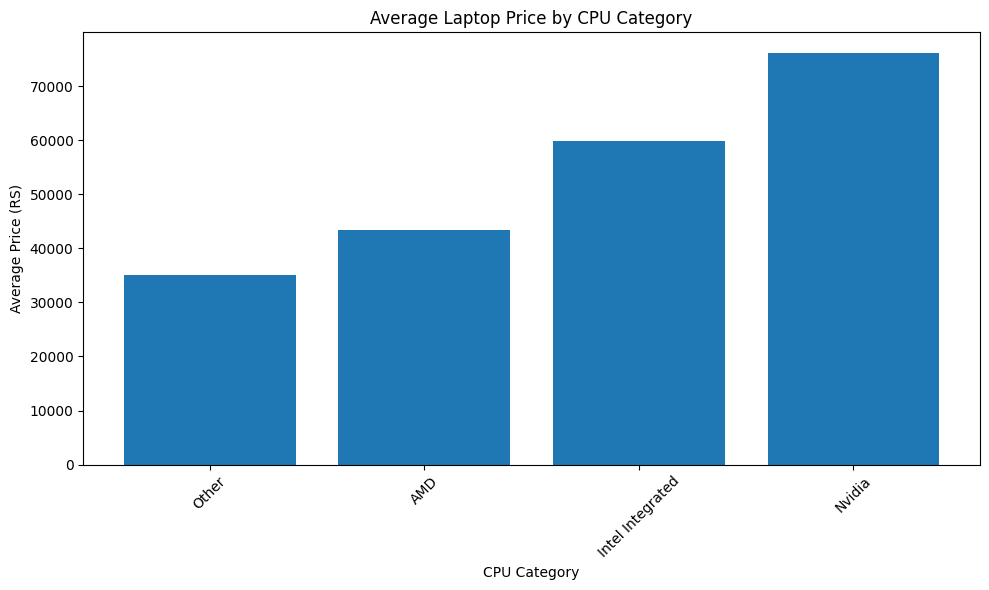

In [31]:
cpu_price = df.groupby('GpuCategory')['Price'].mean().sort_values()
plt.figure(figsize=(10, 6))
plt.bar(cpu_price.index, cpu_price.values)
plt.xticks(rotation=45)
plt.title("Average Laptop Price by CPU Category")
plt.xlabel("CPU Category")
plt.ylabel("Average Price (RS)")
plt.tight_layout()
plt.show()


## Those Laptops Having `NVIDIA` are the most Expensive Ones

In [32]:
cpu_gpu_relation = pd.crosstab(df['TypeName'], df['GpuCategory'])
print(cpu_gpu_relation)


GpuCategory         AMD  Intel Integrated  Nvidia  Other
TypeName                                                
2 in 1 Convertible    2               100       9      1
Gaming                7                 0     192      0
Netbook               0                11       0      0
Notebook            141               330     145      0
Ultrabook            10               163      17      0
Workstation           3                 1      23      0


In [33]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,PriceRange,InchRange,CpuCategory,GpuCategory
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,70000-80000,13-14,Intel Core i5,Intel Integrated
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,40000-50000,13-14,Intel Core i5,Intel Integrated
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,30000-40000,15-16,Intel Core i5,Intel Integrated
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,130000-140000,15-16,Intel Core i7,AMD
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,90000-100000,13-14,Intel Core i5,Intel Integrated


In [37]:
def convert_ram(val):
    if pd.isna(val):
        return np.nan
    val = str(val).upper().replace(" ", "")
    match = re.search(r'(\d+)', val)
    return int(match.group(1)) if match else np.nan

df['Ram'] = df['Ram'].apply(convert_ram)

def convert_storage(val):
    if pd.isna(val):
        return np.nan
    val = str(val).upper().replace(' ', '')
    total = 0
    matches = re.findall(r'(\d+)(TB|GB)', val)
    for amount, unit in matches:
        amount = float(amount)
        if unit == 'TB':
            total += amount * 1024
        else:
            total += amount
    return int(total) if total > 0 else np.nan

def convert_weight(val):
    if pd.isna(val):
        return np.nan
    val = str(val).lower().replace(" ", "").replace("kg", "")
    try:
        return float(val)
    except ValueError:
        return np.nan

df['Weight'] = df['Weight'].apply(convert_weight)
# Convert 'Memory' column to 'Storage' in GB
df['Storage'] = df['Memory'].apply(convert_storage)

# Drop rows with missing target or required features
df = df.dropna(subset=['Ram', 'Weight', 'Storage', 'OpSys', 'Price'])

# -------------------------
# 3. Encode OS with LabelEncoder
# -------------------------
le = LabelEncoder()
df['OpSys'] = df['OpSys'].astype(str)
df['OpSys_encoded'] = le.fit_transform(df['OpSys'])

# -------------------------
# 4. Prepare features and target
# -------------------------
X = df[['Ram', 'Weight', 'Storage', 'OpSys_encoded']]
y = df['Price']

# -------------------------
# 5. Train/test split and model training
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------
# 6. Evaluation
# -------------------------
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# -------------------------
# 7. OS options for user
# -------------------------
print("\nAvailable Operating Systems:")
for i, os_name in enumerate(le.classes_):
    print(f"{i}: {os_name}")

# -------------------------
# 8. Interactive prediction
# -------------------------
try:
    ram = int(input("\nEnter RAM (in GB): "))
    weight = float(input("Enter Weight (in KG): "))
    storage = int(input("Enter Storage (in GB): "))
    os_index = int(input("\nEnter the number corresponding to your Operating System: "))

    if os_index < 0 or os_index >= len(le.classes_):
        raise IndexError

    opsys_input = le.classes_[os_index]
    opsys_encoded = le.transform([opsys_input])[0]

    predicted_price = model.predict([[ram, weight, storage, opsys_encoded]])
    print(f"\n💻 Predicted Laptop Price for OS '{opsys_input}': ₹{predicted_price[0]:,.2f}")

except (ValueError, IndexError):
    print("\n❌ Invalid OS selection. Please enter a number from the list above.")

Mean Squared Error: 763968236.1930097
R² Score: 0.34202175554576475

Available Operating Systems:
0: Android
1: Chrome OS
2: Linux
3: Mac OS X
4: No OS
5: Windows 10
6: Windows 10 S
7: Windows 7
8: macOS



Enter RAM (in GB):  32
Enter Weight (in KG):  2.4
Enter Storage (in GB):  2048

Enter the number corresponding to your Operating System:  8



💻 Predicted Laptop Price for OS 'macOS': ₹178,712.22


C:\Users\Yash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
